# Importing the Libraries and the data

In [1649]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1650]:
df = pd.read_csv("Egypt_Houses_Price.csv")
df.head(5)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


# Exploring the Data

In [1651]:
df.shape

(27361, 12)

In [1652]:
df.dtypes

Type              object
Price             object
Bedrooms          object
Bathrooms         object
Area              object
Furnished         object
Level             object
Compound          object
Payment_Option    object
Delivery_Date     object
Delivery_Term     object
City              object
dtype: object

In [1653]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

Number of null values is low so we can drop them

In [1654]:
df.dropna(inplace=True)
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

In [1655]:
df.shape

(26730, 12)

# Data cleaning

As we saw the columns of (price , bedrooms , Bathrooms, Area) are objects so lets see why and try to solve this problem

In [1656]:
for col in ['Price','Bedrooms','Bathrooms']:
    print(f'{col} : {df[col].unique()}')

Price : ['4000000' '2250000' '1900000' ... '6276000' '11950000' '12284000']
Bedrooms : ['3.0' '2.0' '4.0' '5.0' '1.0' 'Unknown' '7.0' '6.0' '10+' '3' '2' '5' '4'
 '1' '6' '7' '8' '10' '9' '9.0' '8.0' '10.0']
Bathrooms : ['3.0' '2.0' '5.0' '1.0' '4.0' 'Unknown' '7.0' '10+' '3' '2' '1' '4' '6'
 '5' '7' '6.0' '10' '8' '9' '8.0' '10.0' '9.0']


In [1657]:
df[df['Bedrooms'] == '10+']

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
1746,Apartment,2000000,10+,10+,550.0,Unknown,5,Unknown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


There is only 1 row that have the bedrooms and bathroms 10+ so we can drop it with no problem

In [1658]:
df.drop(df[df['Bedrooms'] == '10+'].index,inplace=True)

now lets try to change them to int and float

In [1659]:
df = df.astype({'Price' : 'float', 'Bedrooms' : 'int' , 'Bathrooms' : 'int' , 'Area' : 'float'})
df.dtypes

ValueError: could not convert string to float: 'Unknown': Error while type casting for column 'Price'

as we see there is a problem in the price that it have rows with unknown value so we will drop them as the price is our target

In [1660]:
df = df[df['Price'] != 'Unknown']
df.shape

(26692, 12)

now lets try to change the type again

In [1661]:
df = df.astype({'Price' : 'float', 'Bedrooms' : 'float' , 'Bathrooms' : 'float' , 'Area' : 'float'})
df.dtypes

Type               object
Price             float64
Bedrooms          float64
Bathrooms         float64
Area              float64
Furnished          object
Level              object
Compound           object
Payment_Option     object
Delivery_Date      object
Delivery_Term      object
City               object
dtype: object

Amazing!! it worked let's continue

I am thinking about removing the compound and delivery_term columns but at first let's check if they are correlated to our target

In [1662]:
df['Compound'].astype('category').cat.codes.corr(df['Price'])

-0.11513106540309359

In [1663]:
df['Delivery_Term'].astype('category').cat.codes.corr(df['Price'])

-0.020522557085531905

Since they are not correlated to our target we can drop them 

In [1664]:
df.drop(['Compound','Delivery_Term'],axis='columns',inplace=True)

Now let's see unique values of other columns in our data

In [1665]:
for col in df.drop(['Area','Price','Bedrooms','Bathrooms'],axis='columns').columns:
    print(f'{col} : {df[col].unique()}')

Type : ['Duplex' 'Apartment' 'Penthouse' 'Studio' 'Chalet' 'Standalone Villa'
 'Twin house' 'Town House' 'Stand Alone Villa' 'Twin House']
Furnished : ['No' 'Unknown' 'Yes']
Level : ['7' '10+' '1' '10' 'Ground' 'Highest' '3' '2' '4' '9' '5' '8' '6'
 'Unknown']
Payment_Option : ['Cash' 'Cash or Installment' 'Unknown Payment' 'Installment']
Delivery_Date : ['Ready to move' '2024' 'Unknown' '2023' 'soon' '2025' 'within 6 months'
 '2022' '2026' '2027']
City : ['Nasr City' 'Camp Caesar' 'Smoha' 'New Cairo - El Tagamoa' 'Sheikh Zayed'
 'Shorouk City' 'Sidi Beshr' 'Gesr Al Suez' 'Mokattam' 'New Capital City'
 'New Damietta' 'Zahraa Al Maadi' '6th of October' 'Mansura'
 'New Heliopolis' 'Kafr al-Sheikh City' 'Badr City' 'Sporting' 'Imbaba'
 'Gamasa' 'Borg al-Arab' 'Mohandessin' 'Glim' 'Ain Sukhna' 'Abasiya'
 'Fleming' 'Maadi' 'Hadayek 6th of October' 'Madinaty' 'Haram'
 'Damietta City' 'Ismailia City' '10th of Ramadan' 'Heliopolis'
 'Rehab City' 'Dar al-Salaam' 'Hadayek al-Ahram' 'North Coast'

## 'Type' column cleaning

as we saw not all the data in the same case so lets convert them to lower

In [1666]:
df['Type'] = df['Type'].apply(lambda x : x.lower())
df['Type'].unique()

array(['duplex', 'apartment', 'penthouse', 'studio', 'chalet',
       'standalone villa', 'twin house', 'town house',
       'stand alone villa'], dtype=object)

we have 'standalone villa' and 'stand alone villa' which are the same type so lets make them in the shape of 'standalone villa'

In [1667]:
df['Type'] = df['Type'].str.replace('stand alone villa','standalone villa')
df['Type'].unique()

array(['duplex', 'apartment', 'penthouse', 'studio', 'chalet',
       'standalone villa', 'twin house', 'town house'], dtype=object)

Now let's see the value counts of this columns

In [1668]:
df['Type'].value_counts()

Type
apartment           8498
chalet              6589
standalone villa    4633
town house          3067
twin house          2270
duplex               860
penthouse            526
studio               249
Name: count, dtype: int64

Penthouse and studio are small compared to other types and also in egypt we don't have much of these houses types so lets drop them

In [1669]:
df.drop(df[(df['Type'] == 'penthouse')|(df['Type'] == 'studio')].index,inplace=True)

In [1670]:
df['Type'].value_counts()

Type
apartment           8498
chalet              6589
standalone villa    4633
town house          3067
twin house          2270
duplex               860
Name: count, dtype: int64

## 'Level' column cleaning

In [1671]:
df.Level.unique()

array(['7', '10+', '1', '10', 'Ground', 'Highest', '3', '2', '9', '4',
       '5', '8', '6', 'Unknown'], dtype=object)

At first lets see the unknown levels

In [1672]:
df[df['Level'] == 'Unknown']

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Date,City
9585,chalet,110000.0,2.0,1.0,58.0,Unknown,Unknown,Cash or Installment,Unknown,Alamein
9587,chalet,2800000.0,2.0,2.0,115.0,Unknown,Unknown,Cash or Installment,Unknown,North Coast
9589,chalet,1552000.0,3.0,3.0,115.0,No,Unknown,Cash or Installment,Unknown,North Coast
9594,chalet,14000000.0,3.0,3.0,145.0,Unknown,Unknown,Cash,Unknown,North Coast
9596,standalone villa,30750000.0,4.0,4.0,462.0,Unknown,Unknown,Unknown Payment,Ready to move,Marsa Matrouh
...,...,...,...,...,...,...,...,...,...,...
27355,standalone villa,4800000.0,4.0,3.0,165.0,Unknown,Unknown,Cash or Installment,Unknown,New Cairo - El Tagamoa
27356,town house,890000.0,3.0,2.0,240.0,Unknown,Unknown,Unknown Payment,Unknown,North Coast
27357,town house,4000000.0,4.0,3.0,218.0,Unknown,Unknown,Cash or Installment,Unknown,New Cairo - El Tagamoa
27358,twin house,13800000.0,3.0,4.0,308.0,No,Unknown,Cash,Ready to move,New Cairo - El Tagamoa


In [1673]:
df[(df['Level'] == 'Unknown') & (df['Type'] == 'apartment')]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Date,City


we don't have apartments with unknow level and it is pretty good but we have chalets with unknown levels so lets drop them

In [1674]:
df.drop(df[(df['Level'] == 'Unknown') & (df['Type'] == 'chalet')].index,inplace=True)

For villas and houses that actually don't have level lets assign special value to them like -1

In [1675]:
for type in df.Type.unique():
    if type not in ['duplex','apartment','chalet']:
        df.loc[df['Type'] == type, 'Level'] = '-1'

In [1676]:
df.sample(5)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Date,City
6652,apartment,1950000.0,2.0,2.0,110.0,Unknown,Ground,Cash,Ready to move,Rehab City
166,apartment,250000.0,3.0,2.0,153.0,No,1,Cash or Installment,Unknown,Madinaty
16240,chalet,2928000.0,3.0,3.0,150.0,Unknown,2,Cash or Installment,soon,North Coast
4411,apartment,450000.0,3.0,2.0,130.0,No,Highest,Installment,Ready to move,New Cairo - El Tagamoa
25795,town house,5900000.0,3.0,3.0,275.0,No,-1,Cash or Installment,soon,Shorouk City


In [1677]:
df[df['Level'] == 'Unknown']

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Date,City
9884,duplex,2800000.0,3.0,3.0,137.0,No,Unknown,Installment,Unknown,North Coast
12082,duplex,1100000.0,3.0,2.0,120.0,Yes,Unknown,Cash or Installment,Unknown,Ain Sukhna
12291,duplex,2800000.0,3.0,3.0,137.0,No,Unknown,Installment,Unknown,North Coast
12356,duplex,4800000.0,3.0,3.0,192.0,No,Unknown,Installment,Unknown,North Coast
12357,duplex,5100000.0,3.0,3.0,194.0,No,Unknown,Installment,Unknown,North Coast
12501,duplex,5200000.0,3.0,3.0,180.0,Yes,Unknown,Unknown Payment,Unknown,North Coast
12775,duplex,1700000.0,2.0,2.0,100.0,Unknown,Unknown,Unknown Payment,Unknown,North Coast
12902,duplex,255000.0,4.0,3.0,187.0,Unknown,Unknown,Unknown Payment,Unknown,North Coast
13209,duplex,2636000.0,3.0,2.0,140.0,Unknown,Unknown,Cash or Installment,Unknown,North Coast
14498,duplex,4800000.0,3.0,3.0,192.0,No,Unknown,Installment,2026,North Coast


we still have some data with unknown level and they are duplexes so lets drop them as they are not helpful

In [1678]:
df.drop(df[(df['Level'] == 'Unknown') & (df['Type'] == 'duplex')].index,inplace=True)

Now let's check how many rows have 10+ or highest in level columns

In [1679]:
df[(df['Level'] == '10+') | (df['Level'] == 'Highest')].shape

(361, 10)

okay they are small so we can drop them with no problem as they are also unknown for us

In [1680]:
df.drop(df[(df['Level'] == '10+') | (df['Level'] == 'Highest')].index,inplace=True)

now lets replace Ground level with zero so all of the data be numerical

In [1681]:
df['Level'] = df['Level'].str.replace("Ground",'0')

In [1682]:
df['Level'].unique()

array(['7', '1', '10', '0', '3', '2', '9', '4', '5', '8', '6', '-1'],
      dtype=object)

alright now lets change its type to integer

In [1683]:
df['Level'] = df['Level'].astype(int)

## 'City' Column Cleaning

In [1684]:
city_counts = df['City'].value_counts()
city_counts

City
New Cairo - El Tagamoa    6247
North Coast               5362
Sheikh Zayed              2240
6th of October            1666
Madinaty                  1539
                          ... 
New Beni Suef                1
Kafr al-Dawwar               1
Darb al-Ahmar                1
Quesna                       1
Abu Rawash                   1
Name: count, Length: 176, dtype: int64

we have cities with 1 house in our data so lets make the cities with less than 10 houses as others

In [1685]:
city_counts_less_than_10 = city_counts[city_counts<=10]

In [1686]:
df['City'] = df['City'].apply(lambda x : 'other' if x in city_counts_less_than_10 else x)
df.head(3)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Date,City
0,duplex,4000000.0,3.0,3.0,400.0,No,7,Cash,Ready to move,Nasr City
2,apartment,2250000.0,3.0,2.0,165.0,No,1,Cash,Ready to move,Smoha
3,apartment,1900000.0,3.0,2.0,230.0,No,10,Cash,Ready to move,Nasr City


Now lets check our unique values of the data columns and see if everything is right

In [1687]:
for col in df.drop(['Area','Price','Bedrooms','Bathrooms'],axis='columns').columns:
    print(f'{col} : {df[col].unique()}')

Type : ['duplex' 'apartment' 'chalet' 'standalone villa' 'twin house'
 'town house']
Furnished : ['No' 'Unknown' 'Yes']
Level : [ 7  1 10  0  3  2  9  4  5  8  6 -1]
Payment_Option : ['Cash' 'Cash or Installment' 'Unknown Payment' 'Installment']
Delivery_Date : ['Ready to move' '2024' 'Unknown' '2023' 'soon' '2025' 'within 6 months'
 '2022' '2026' '2027']
City : ['Nasr City' 'Smoha' 'New Cairo - El Tagamoa' 'Sheikh Zayed'
 'Shorouk City' 'Gesr Al Suez' 'New Capital City' 'New Damietta'
 'Zahraa Al Maadi' '6th of October' 'Mansura' 'New Heliopolis' 'other'
 'Badr City' 'Borg al-Arab' 'Mohandessin' 'Glim' 'Ain Sukhna' 'Maadi'
 'Hadayek 6th of October' 'Madinaty' 'Haram' 'Ismailia City'
 '10th of Ramadan' 'Heliopolis' 'Rehab City' 'Hadayek al-Ahram'
 'North Coast' 'Sidi Beshr' 'Nakheel' 'Obour City' 'Hurghada' 'Tanta'
 'Helmeyat El Zaytoun' 'Mokattam' 'Katameya' 'Alamein' 'Miami'
 'Hadayek al-Kobba' 'Mostakbal City' 'Agami' 'Ras al-Bar' 'Mandara'
 '15 May City' 'Seyouf' 'Sharq District' '

In [1688]:
df[df['City']=="(View phone number)"].shape

(48, 10)

we have 48 rows that have '(View phone number)' in the city which is an error so lets drop them as they are small

In [1689]:
df.drop(df[df['City']=="(View phone number)"].index,inplace=True)

In [1690]:
df['City'].unique()

array(['Nasr City', 'Smoha', 'New Cairo - El Tagamoa', 'Sheikh Zayed',
       'Shorouk City', 'Gesr Al Suez', 'New Capital City', 'New Damietta',
       'Zahraa Al Maadi', '6th of October', 'Mansura', 'New Heliopolis',
       'other', 'Badr City', 'Borg al-Arab', 'Mohandessin', 'Glim',
       'Ain Sukhna', 'Maadi', 'Hadayek 6th of October', 'Madinaty',
       'Haram', 'Ismailia City', '10th of Ramadan', 'Heliopolis',
       'Rehab City', 'Hadayek al-Ahram', 'North Coast', 'Sidi Beshr',
       'Nakheel', 'Obour City', 'Hurghada', 'Tanta',
       'Helmeyat El Zaytoun', 'Mokattam', 'Katameya', 'Alamein', 'Miami',
       'Hadayek al-Kobba', 'Mostakbal City', 'Agami', 'Ras al-Bar',
       'Mandara', '15 May City', 'Seyouf', 'Sharq District', 'Laurent',
       'New Mansoura', 'Dokki', 'Sheraton', 'Faisal', 'Roushdy',
       'Zagazig', 'Moharam Bik', 'West Somid', 'Asafra', 'Gouna',
       'Zamalek', 'Shubra', 'Marsa Matrouh', 'Giza District',
       'Saba Pasha', 'Kafr Abdo', 'Zezenia', 'New

alright city column is done

## 'Furnished' column cleaning

as we saw in furnished column unique values no,unknown,yes so lets replace the unknown one with no

In [1691]:
df['Furnished'] = df['Furnished'].str.replace('Unknown','No')

## 'Payment_Option' Column cleaning

aswe saw we had unknown payment in the payment option lets see if they are small we can drop them or not

In [1692]:
df[df['Payment_Option'] == 'Unknown Payment']

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Delivery_Date,City
7,apartment,1650000.0,2.0,2.0,144.0,No,1,Unknown Payment,Ready to move,Sheikh Zayed
8,apartment,1560000.0,3.0,3.0,200.0,No,0,Unknown Payment,Unknown,New Cairo - El Tagamoa
25,apartment,1730000.0,3.0,2.0,160.0,No,7,Unknown Payment,Unknown,Smoha
33,duplex,6095000.0,4.0,5.0,246.0,No,0,Unknown Payment,2024,Sheikh Zayed
47,apartment,1446394.0,3.0,2.0,158.0,No,4,Unknown Payment,Ready to move,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...
27342,standalone villa,11800000.0,4.0,5.0,315.0,No,-1,Unknown Payment,2025,Sheikh Zayed
27345,standalone villa,480000.0,3.0,2.0,165.0,No,-1,Unknown Payment,Unknown,New Cairo - El Tagamoa
27349,town house,500000.0,4.0,3.0,387.0,No,-1,Unknown Payment,Unknown,New Capital City
27356,town house,890000.0,3.0,2.0,240.0,No,-1,Unknown Payment,Unknown,North Coast


they are 2586 which is not small so i will assume that the unknown payment is Cash or Installment

In [1693]:
df['Payment_Option'] = df['Payment_Option'].str.replace('Unknown Payment','Cash or Installment')

now lets check our unique values 

In [1694]:
for col in df.drop(['Area','Price','Bedrooms','Bathrooms'],axis='columns').columns:
    print(f'{col} : {df[col].unique()}')

Type : ['duplex' 'apartment' 'chalet' 'standalone villa' 'twin house'
 'town house']
Furnished : ['No' 'Yes']
Level : [ 7  1 10  0  3  2  9  4  5  8  6 -1]
Payment_Option : ['Cash' 'Cash or Installment' 'Installment']
Delivery_Date : ['Ready to move' '2024' 'Unknown' '2023' 'soon' '2025' 'within 6 months'
 '2022' '2026' '2027']
City : ['Nasr City' 'Smoha' 'New Cairo - El Tagamoa' 'Sheikh Zayed'
 'Shorouk City' 'Gesr Al Suez' 'New Capital City' 'New Damietta'
 'Zahraa Al Maadi' '6th of October' 'Mansura' 'New Heliopolis' 'other'
 'Badr City' 'Borg al-Arab' 'Mohandessin' 'Glim' 'Ain Sukhna' 'Maadi'
 'Hadayek 6th of October' 'Madinaty' 'Haram' 'Ismailia City'
 '10th of Ramadan' 'Heliopolis' 'Rehab City' 'Hadayek al-Ahram'
 'North Coast' 'Sidi Beshr' 'Nakheel' 'Obour City' 'Hurghada' 'Tanta'
 'Helmeyat El Zaytoun' 'Mokattam' 'Katameya' 'Alamein' 'Miami'
 'Hadayek al-Kobba' 'Mostakbal City' 'Agami' 'Ras al-Bar' 'Mandara'
 '15 May City' 'Seyouf' 'Sharq District' 'Laurent' 'New Mansoura' 'Dok

They are looking good so lets see the delivery date column

## 'Delivery_Date' column

In [1695]:
df['Delivery_Date'].value_counts()

Delivery_Date
Ready to move      11056
Unknown             8714
soon                1549
2024                1012
2025                1008
2023                 641
2026                 358
within 6 months      160
2022                 117
2027                   4
Name: count, dtype: int64

it have majority of unknown values so lets see if it is correlated to our price or not

In [1696]:
df['Delivery_Date'].astype('category').cat.codes.corr(df['Price'])

-0.004198657718476838

it is not correlated to our price so we can drop it

In [1697]:
df.drop(['Delivery_Date'],axis='columns',inplace=True)

Lets checkout unique values for one last time

In [1698]:
for col in df.drop(['Area','Price','Bedrooms','Bathrooms'],axis='columns').columns:
    print(f'{col} : {df[col].unique()}')

Type : ['duplex' 'apartment' 'chalet' 'standalone villa' 'twin house'
 'town house']
Furnished : ['No' 'Yes']
Level : [ 7  1 10  0  3  2  9  4  5  8  6 -1]
Payment_Option : ['Cash' 'Cash or Installment' 'Installment']
City : ['Nasr City' 'Smoha' 'New Cairo - El Tagamoa' 'Sheikh Zayed'
 'Shorouk City' 'Gesr Al Suez' 'New Capital City' 'New Damietta'
 'Zahraa Al Maadi' '6th of October' 'Mansura' 'New Heliopolis' 'other'
 'Badr City' 'Borg al-Arab' 'Mohandessin' 'Glim' 'Ain Sukhna' 'Maadi'
 'Hadayek 6th of October' 'Madinaty' 'Haram' 'Ismailia City'
 '10th of Ramadan' 'Heliopolis' 'Rehab City' 'Hadayek al-Ahram'
 'North Coast' 'Sidi Beshr' 'Nakheel' 'Obour City' 'Hurghada' 'Tanta'
 'Helmeyat El Zaytoun' 'Mokattam' 'Katameya' 'Alamein' 'Miami'
 'Hadayek al-Kobba' 'Mostakbal City' 'Agami' 'Ras al-Bar' 'Mandara'
 '15 May City' 'Seyouf' 'Sharq District' 'Laurent' 'New Mansoura' 'Dokki'
 'Sheraton' 'Faisal' 'Roushdy' 'Zagazig' 'Moharam Bik' 'West Somid'
 'Asafra' 'Gouna' 'Zamalek' 'Shubra' 'Ma

In [1699]:
df.sample(3)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City
5466,apartment,2250000.0,2.0,2.0,175.0,No,8,Cash,Heliopolis
11171,chalet,4100000.0,4.0,2.0,113.0,Yes,0,Cash,North Coast
20352,twin house,7106000.0,3.0,3.0,194.0,No,-1,Cash or Installment,New Cairo - El Tagamoa


Alright everything looks good lets continue

# Outlier Detection and removal

## check if there houses with rooms smaller than 8m2 (minimum room size) 

In [1700]:
df[df.Area/df.Bedrooms<8].head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City
2280,apartment,3200000.0,4.0,1.0,20.0,No,4,Cash or Installment,New Capital City
6990,apartment,1128000.0,3.0,2.0,14.0,No,3,Installment,New Cairo - El Tagamoa
7345,apartment,1500000.0,3.0,3.0,10.0,No,4,Cash or Installment,New Cairo - El Tagamoa
15977,chalet,3000000.0,2.0,2.0,12.0,No,0,Cash,North Coast
24905,standalone villa,29000000.0,5.0,6.0,11.0,No,-1,Cash,New Cairo - El Tagamoa


yeah we some houses with rooms smaller than 8m2 so we will remove them

In [1701]:
df.drop(df[df.Area/df.Bedrooms<8].index,inplace=True)

## check if there houses with 2 bathrooms more than rooms and remove them

In [1702]:
df[df.Bathrooms > df.Bedrooms+2]

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City
11020,town house,16500000.0,6.0,10.0,420.0,No,-1,Cash,Heliopolis
13515,standalone villa,33000000.0,4.0,7.0,450.0,Yes,-1,Cash,North Coast
13519,standalone villa,36000000.0,4.0,7.0,350.0,Yes,-1,Cash,North Coast
13792,standalone villa,16000000.0,4.0,7.0,400.0,Yes,-1,Cash,Alamein
13870,standalone villa,26000000.0,6.0,9.0,339.0,No,-1,Cash or Installment,North Coast
14798,standalone villa,20000000.0,5.0,8.0,580.0,No,-1,Cash,North Coast
17150,standalone villa,75000000.0,5.0,8.0,464.0,No,-1,Cash or Installment,North Coast
17515,standalone villa,450000.0,4.0,7.0,374.0,No,-1,Cash or Installment,North Coast
18791,standalone villa,18000000.0,6.0,10.0,350.0,Yes,-1,Cash or Installment,Sheikh Zayed
19947,standalone villa,12500000.0,6.0,10.0,586.0,No,-1,Cash,New Cairo - El Tagamoa


In [1703]:
df.drop(df[df.Bathrooms > df.Bedrooms+2].index,inplace=True)

## price outliers detection and removal

In [1704]:
df.Price.describe().round(1)

count        24592.0
mean       4521694.1
std        5660292.3
min          30000.0
25%        1200000.0
50%        2729000.0
75%        5825974.0
max      205000000.0
Name: Price, dtype: float64

we have minimum of 30k and maximum of 205m where the actual minimum price for house is around 800k and maximum of 65m

In [1705]:
df = df[~((df['Price'] < 800000) | (df['Price'] >= 65000000))]

In [1706]:
#lets get the price per m2 of each house
df['price_per_m2'] = (df['Price']/df['Area']).round(2)
df.sample(3)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,price_per_m2
3027,apartment,1052000.0,3.0,3.0,166.0,No,3,Installment,New Heliopolis,6337.35
22127,twin house,8500000.0,4.0,4.0,412.0,No,-1,Cash,New Cairo - El Tagamoa,20631.07
24691,standalone villa,1000000.0,5.0,5.0,300.0,No,-1,Cash or Installment,New Cairo - El Tagamoa,3333.33


Now lets remove the outliers from each type of houses

In [1707]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Type'):
        m = np.mean(subdf.price_per_m2)
        st = np.std(subdf.price_per_m2)
        reduced_df = subdf[(subdf.price_per_m2>=(m-st)) & (subdf.price_per_m2<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(16309, 10)

In [1708]:
df.shape

(16309, 10)

In [1709]:
df.Price.describe().round(1)

count       16309.0
mean      4937336.3
std       4244634.4
min        800000.0
25%       2100000.0
50%       3500000.0
75%       6450000.0
max      34000000.0
Name: Price, dtype: float64

In [1710]:
df.sample(5)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,price_per_m2
2918,apartment,1850000.0,3.0,2.0,116.0,No,4,Cash,Madinaty,15948.28
15021,twin house,12000000.0,3.0,4.0,442.0,No,-1,Cash,New Cairo - El Tagamoa,27149.32
7207,chalet,2300000.0,2.0,1.0,100.0,No,1,Cash or Installment,New Cairo - El Tagamoa,23000.00
12700,town house,6558000.0,4.0,4.0,200.0,No,-1,Cash or Installment,North Coast,32790.00
4941,apartment,3300000.0,3.0,3.0,165.0,No,0,Cash,Madinaty,20000.00


# data visualization

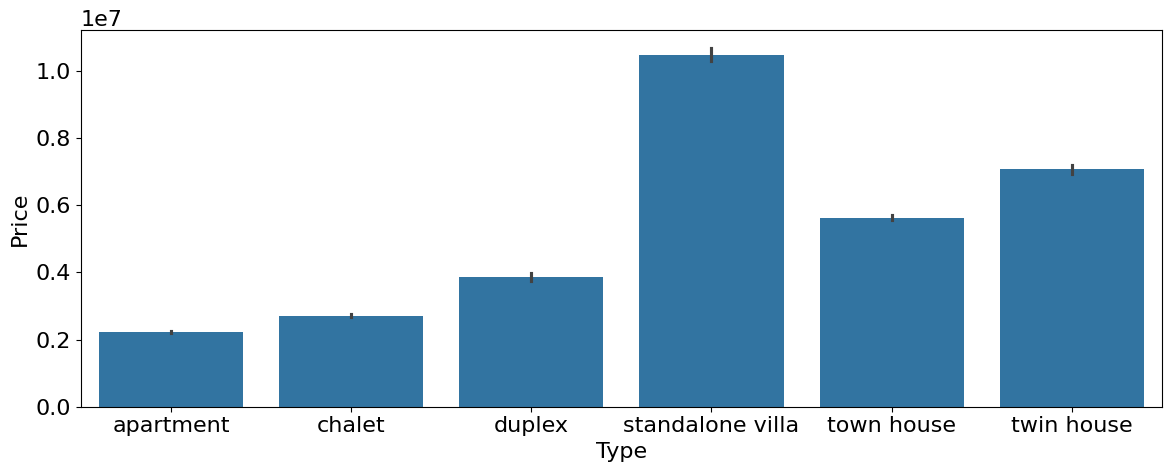

In [1711]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Type', y='Price')
plt.tight_layout()
plt.show()

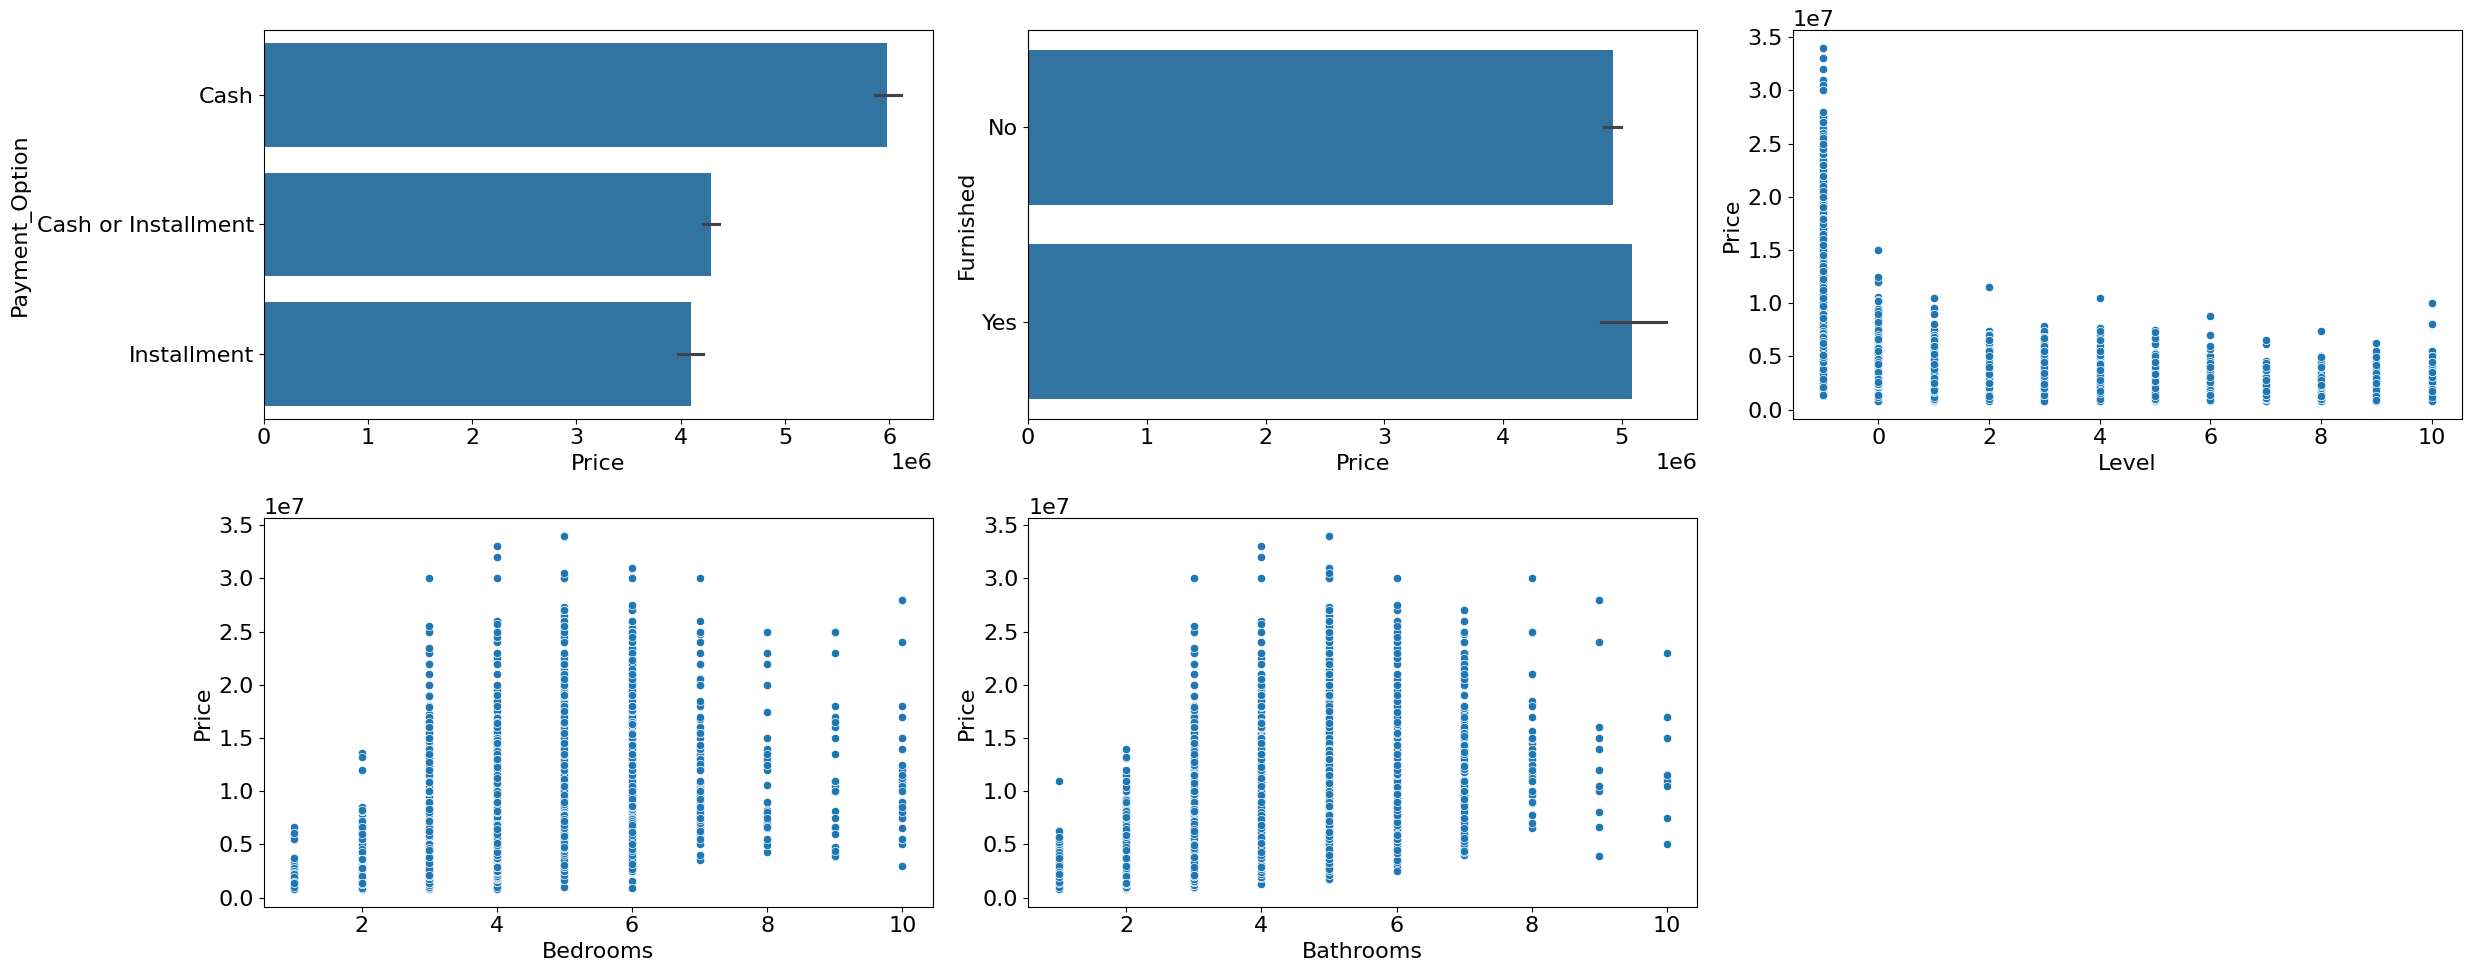

In [1712]:
fig,axs = plt.subplots(2,3,figsize=(25,10))
sns.barplot(data=df, x='Price', y='Payment_Option',ax=axs[0,0])
sns.barplot(data=df, x='Price', y='Furnished',ax=axs[0,1])
sns.scatterplot(data=df,x='Level',y='Price',ax=axs[0,2])
sns.scatterplot(data=df,x='Bedrooms',y='Price',ax=axs[1,0])
sns.scatterplot(data=df,x='Bathrooms',y='Price',ax=axs[1,1])
axs[1,2].axis('off')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [1713]:
df['Type'].unique()

array(['apartment', 'chalet', 'duplex', 'standalone villa', 'town house',
       'twin house'], dtype=object)

In [1714]:
df['Type'] = df['Type'].map({'apartment' : 0 , 'duplex' : 1 , 'chalet' : 2 , 'twin house' : 3 , 'town house' : 4 , 'standalone villa' : 5 })
df["Type"].unique()

array([0, 2, 1, 5, 4, 3], dtype=int64)

In [1715]:
df['Furnished'] = df['Furnished'].map({'No' : 0 , 'Yes' : 1})
df['Furnished'].unique()

array([0, 1], dtype=int64)

In [1716]:
df['Payment_Option'].unique()

array(['Cash', 'Cash or Installment', 'Installment'], dtype=object)

In [1717]:
df['Payment_Option'] = df['Payment_Option'].map({'Cash' : 0 , 'Installment' : 1,'Cash or Installment' : 2})
df['Payment_Option'].unique()

array([0, 2, 1], dtype=int64)

In [1718]:
df.sample(3)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,price_per_m2
6953,2,2200000.0,2.0,2.0,115.0,0,1,1,North Coast,19130.43
14401,4,2980000.0,4.0,5.0,190.0,0,-1,1,New Cairo - El Tagamoa,15684.21
6729,2,2800000.0,2.0,2.0,92.0,0,1,2,North Coast,30434.78


Before we preprocess the price column lets see its visualization with the are

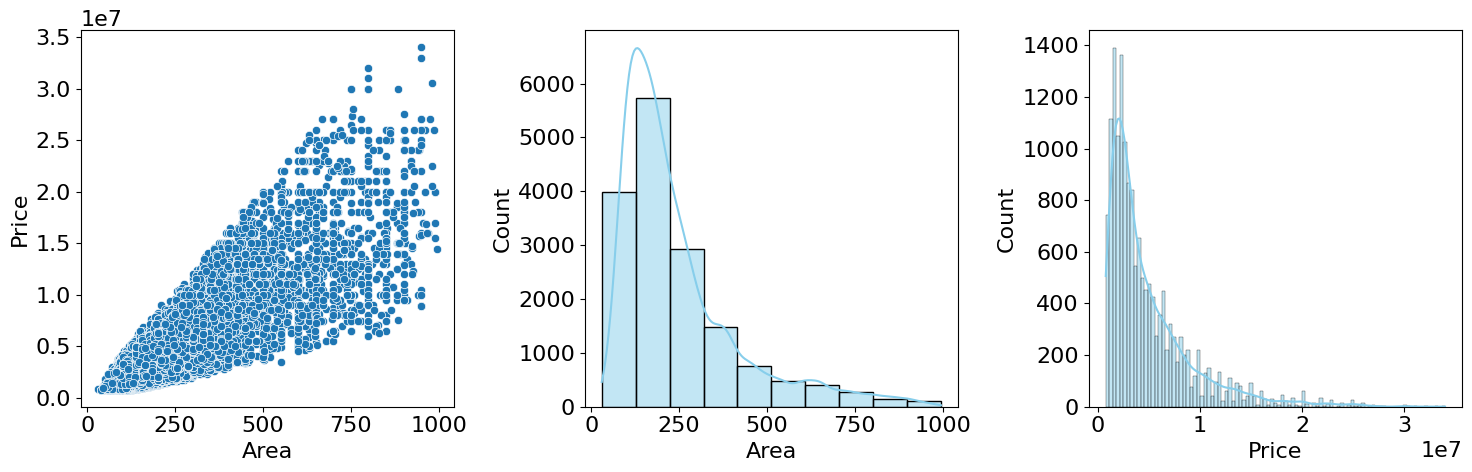

In [1719]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(data=df, x='Area', y='Price',ax=axs[0])
sns.histplot(df['Area'], kde=True, color='skyblue', bins=10,ax=axs[1])
sns.histplot(df['Price'], kde=True, color='skyblue',ax=axs[2]) 
plt.tight_layout()
plt.show()

as we have very prices lets scale it with the log scaling technique that wil also make normal distrubited

In [1720]:
df['Log_Price'] = np.log(df['Price'])

In [1721]:
df.sample(3)

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,price_per_m2,Log_Price
10912,5,8000000.0,5.0,5.0,200.0,0,-1,2,Rehab City,40000.00,15.894952
2998,0,1629300.0,3.0,2.0,157.0,0,2,2,New Cairo - El Tagamoa,10377.71,14.303661
6379,2,934000.0,1.0,1.0,50.0,1,1,2,Ain Sukhna,18680.00,13.747232


lets visualize log price distrubition and it versus the area

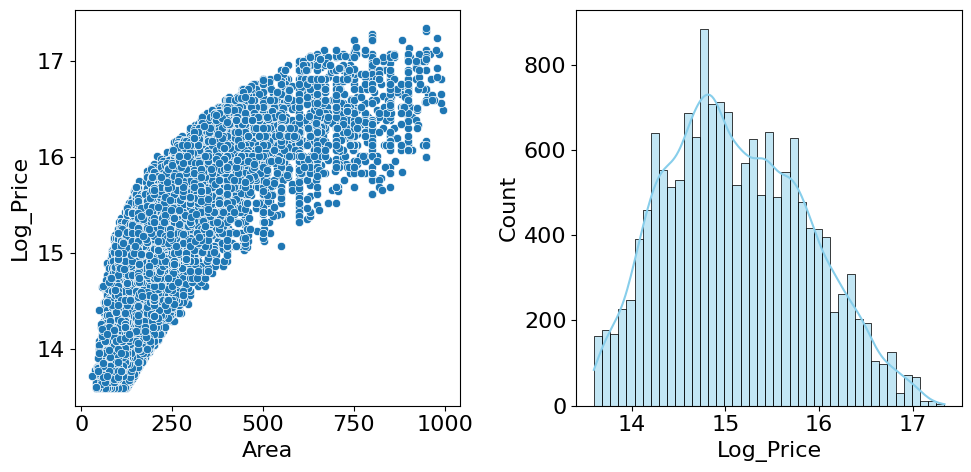

In [1722]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=df, x='Area', y='Log_Price',ax=axs[0])
sns.histplot(df['Log_Price'], kde=True, color='skyblue',ax=axs[1])
plt.tight_layout()
plt.show()

it looks pretty good so now lets drop the price_per_m2 and price columns as we dont need them any more

In [1723]:
df.drop(['price_per_m2','Price'],axis='columns',inplace=True)
df.sample(3)

,Type,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Log_Price
4100,0,4.0,3.0,240.0,0,1,2,Obour City,14.48334
11670,5,5.0,5.0,750.0,0,-1,0,Rehab City,16.38046
11465,5,4.0,3.0,506.0,0,-1,2,Sheikh Zayed,15.64006


## One Hot Encoding for city column

In [1724]:
dummies = pd.get_dummies(df['City'])
dummies = dummies.astype(int)
dummies.head(3)

,10th of Ramadan,15 May City,6th of October,Agami,Ain Sukhna,Alamein,Amreya,Asafra,Asyut City,Badr City,...,Shubra,Sidi Beshr,Smoha,Tanta,West Somid,Zagazig,Zahraa Al Maadi,Zamalek,Zezenia,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1725]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df.head()

,Type,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,City,Log_Price,10th of Ramadan,...,Shorouk City,Shubra,Sidi Beshr,Smoha,Tanta,West Somid,Zagazig,Zahraa Al Maadi,Zamalek,Zezenia
0,0,3.0,2.0,165.0,0,1,0,Smoha,14.626441,0,...,0,0,0,1,0,0,0,0,0,0
1,0,3.0,2.0,230.0,0,10,0,Nasr City,14.457364,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4.0,3.0,222.0,0,1,2,New Cairo - El Tagamoa,14.427936,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.0,2.0,144.0,0,1,2,Sheikh Zayed,14.316286,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3.0,3.0,200.0,0,0,2,New Cairo - El Tagamoa,14.260196,0,...,0,0,0,0,0,0,0,0,0,0


now we can remove city column

In [1726]:
df.drop(['City'],axis='columns',inplace=True)
df.head(3)

,Type,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,Log_Price,10th of Ramadan,15 May City,...,Shorouk City,Shubra,Sidi Beshr,Smoha,Tanta,West Somid,Zagazig,Zahraa Al Maadi,Zamalek,Zezenia
0,0,3.0,2.0,165.0,0,1,0,14.626441,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,3.0,2.0,230.0,0,10,0,14.457364,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4.0,3.0,222.0,0,1,2,14.427936,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

## Spliting the data into train,val,test

In [1727]:
x = df.drop(['Log_Price'],axis='columns')
y = df['Log_Price']

In [1728]:
x

,Type,Bedrooms,Bathrooms,Area,Furnished,Level,Payment_Option,10th of Ramadan,15 May City,6th of October,...,Shorouk City,Shubra,Sidi Beshr,Smoha,Tanta,West Somid,Zagazig,Zahraa Al Maadi,Zamalek,Zezenia
0,0,3.0,2.0,165.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,3.0,2.0,230.0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,4.0,3.0,222.0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2.0,2.0,144.0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3.0,3.0,200.0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,3,6.0,5.0,429.0,0,-1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16305,3,4.0,4.0,450.0,1,-1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16306,3,4.0,3.0,200.0,0,-1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16307,3,3.0,3.0,200.0,0,-1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1729]:
y

0        14.626441
1        14.457364
2        14.427936
3        14.316286
4        14.260196
           ...    
16304    15.967273
16305    15.732433
16306    15.671809
16307    15.652243
16308    16.323808
Name: Log_Price, Length: 16309, dtype: float64

In [1730]:
from sklearn.model_selection import train_test_split
X, X_test, Y, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [1731]:
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.2,random_state=10)

## Model (XGBRegressor)

In [1732]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()

xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1733]:
xgb_regressor.score(X_train,y_train)

0.8942180432888496

In [1734]:
xgb_regressor.score(X_val,y_val)

0.85327442166328

There is an overfit let's try to make the model less complex

In [1735]:
xgb_regressor = XGBRegressor(max_depth = 16 , max_leaves= 16)

xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=16,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1736]:
xgb_regressor.score(X_train,y_train)

0.8697777011706754

In [1737]:
xgb_regressor.score(X_val,y_val)

0.8496268837933676

perfect now the difference is about 2% and it is quite well lets evaluate the model on the test data

In [1738]:
xgb_regressor.score(X_test,y_test)

0.8472715634283059

85% accuracy is quite well accuracy for this data